In [ ]:
#Observations:
#1, The number of mice tested among different drugs and between female and male does not have big difference.
#2, According to box plot, the result for Capomulin and Ramicane is much better than Infubinol and Ceftamin
#3, Mice weight and tumor volumn has positive relation, the heavier the mouse is, the more tumor they have.

## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()
# Combine the data into a single dataset
combined = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
combined.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [3]:
# Checking the number of mice.
number_of_mice = combined["Mouse ID"].nunique()
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined[combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

print(duplicate)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined.drop([107,137,329,360,620,681,815,869,950,1111])

In [7]:
# Checking the number of mice in the clean DataFrame.
duplicate = clean[clean.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print(duplicate)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


## Summary Statistics

In [8]:
clean

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1883 rows x 8 columns]

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame('Means').reset_index()
median = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().to_frame('Median').reset_index()
variance = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof=1).to_frame('Variance').reset_index()
std = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof=1).to_frame('Standard Deviation').reset_index()
sem = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(ddof=1).to_frame('SEM').reset_index()

from functools import reduce
summary  = reduce(lambda x,y: pd.merge(x,y, on='Drug Regimen', how='outer'), [means, median, variance,std,sem])
summary

Drug Regimen      Means     Median   Variance  Standard Deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.458254  50.854632  44.053659            6.637293  0.540135
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_A = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([np.mean,np.median,np.var,np.std,st.sem])
summary_A

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_number = clean.groupby("Drug Regimen")['Mouse ID'].count().reset_index()
total_number

Drug Regimen  Mouse ID
0    Capomulin       230
1     Ceftamin       178
2    Infubinol       178
3     Ketapril       188
4     Naftisol       186
5      Placebo       181
6     Propriva       151
7     Ramicane       228
8     Stelasyn       181
9    Zoniferol       182

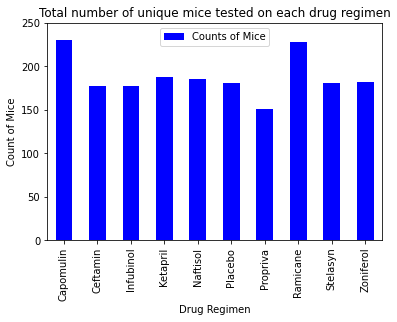

In [12]:
bar_plot = total_number.plot(kind="bar",x = 'Drug Regimen',y = 'Mouse ID',color = 'blue')
plt.legend(['Counts of Mice'])
plt.ylim(0,250)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.title("Total number of unique mice tested on each drug regimen")
plt.show()

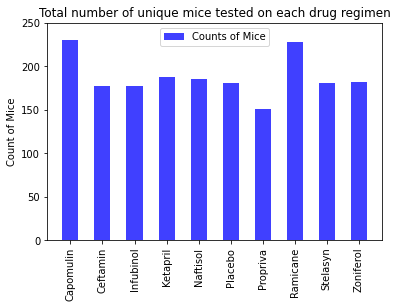

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bar_pyplot = plt.bar(total_number["Drug Regimen"],total_number["Mouse ID"],color = 'blue',alpha = 0.75,align = "center",width = 0.5)
plt.legend(['Counts of Mice'])
plt.ylim(0,250)
plt.xticks(total_number["Drug Regimen"],total_number["Drug Regimen"],rotation = 'vertical')
plt.ylabel("Count of Mice")
plt.title("Total number of unique mice tested on each drug regimen")
plt.show()
plt.tight_layout()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean.groupby("Sex")['Mouse ID'].count().reset_index()
gender.index = gender["Sex"]
gender

Sex  Mouse ID
Sex                     
Female  Female       925
Male      Male       958

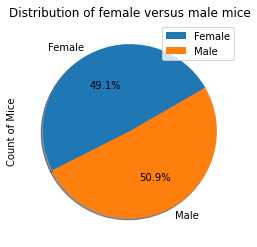

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_plot = gender.plot(kind='pie', y = "Mouse ID",title = "Distribution of female versus male mice",shadow = True,startangle=30,autopct='%1.1f%%')
plt.ylabel("Count of Mice")
plt.title("Distribution of female versus male mice")
plt.show()

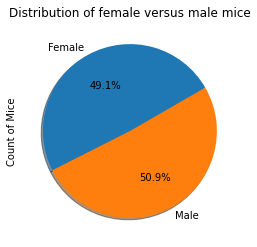

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = plt.pie(gender["Mouse ID"],labels =gender["Sex"], autopct="%1.1f%%",shadow=True,startangle=30)
plt.ylabel("Count of Mice")
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest =clean.groupby("Mouse ID")['Tumor Volume (mm3)'].max()
greatest

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(clean,greatest,on = "Mouse ID",how = "left")
new_df = new_df.rename(columns={"Tumor Volume (mm3)_y":"Greatest Volumn"})
new_df

Mouse ID  Timepoint  Tumor Volume (mm3)_x  Metastatic Sites Drug Regimen  \
0        b128          0             45.000000                 0    Capomulin   
1        f932          0             45.000000                 0     Ketapril   
2        g107          0             45.000000                 0     Ketapril   
3        a457          0             45.000000                 0     Ketapril   
4        c819          0             45.000000                 0     Ketapril   
...       ...        ...                   ...               ...          ...   
1878     r944         45             41.581521                 2    Capomulin   
1879     u364         45             31.023923                 3    Capomulin   
1880     p438         45             61.433892                 1     Ceftamin   
1881     x773         45             58.634971                 4      Placebo   
1882     b879         45             72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  Greatest Volumn  
0     Female           9          22        45.651331  
1       Male          15          29        45.000000  
2     Female           2          29        71.905117  
3     Female          11          30        49.783419  
4       Male          21          25        62.175705  
...      ...         ...         ...              ...  
1878    Male          12          25        47.373423  
1879    Male          18          17        47.212200  
1880  Female          11          26        61.433892  
1881  Female          21          30        58.634971  
1882  Female           4          26        72.555239  

[1883 rows x 9 columns]

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
greatest_drug = new_df.copy()
greatest_drug = greatest_drug.drop(['Timepoint','Tumor Volume (mm3)_x','Metastatic Sites','Sex','Age_months','Weight (g)'],axis = 1)
greatest_drug = greatest_drug.drop_duplicates(['Mouse ID','Drug Regimen','Greatest Volumn'],keep='last')
drug = greatest_drug["Drug Regimen"]
greatest_drug["Drug"] = drug
greatest_drug = greatest_drug.set_index("Drug Regimen")
greatest_drug = greatest_drug.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
greatest_drug
    # add subset 

    
    

Mouse ID  Greatest Volumn       Drug
Drug Regimen                                     
Capomulin        w150        45.000000  Capomulin
Capomulin        r157        46.539206  Capomulin
Capomulin        f966        45.000000  Capomulin
Capomulin        j246        46.408361  Capomulin
Capomulin        b128        45.651331  Capomulin
...               ...              ...        ...
Ceftamin         k210        68.923185   Ceftamin
Ceftamin         x822        61.386660   Ceftamin
Ceftamin         l733        64.299830   Ceftamin
Ceftamin         o287        59.741901   Ceftamin
Ceftamin         p438        61.433892   Ceftamin

[100 rows x 3 columns]

In [20]:
# add subset ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capomulin = greatest_drug.loc[greatest_drug["Drug"] == "Capomulin",:]
ramicane = greatest_drug.loc[greatest_drug["Drug"] == "Ramicane",:]
infubinol = greatest_drug.loc[greatest_drug["Drug"] == "Infubinol",:]
ceftamin = greatest_drug.loc[greatest_drug["Drug"] == "Ceftamin",:]
capomulin.head()

Mouse ID  Greatest Volumn       Drug
Drug Regimen                                     
Capomulin        w150        45.000000  Capomulin
Capomulin        r157        46.539206  Capomulin
Capomulin        f966        45.000000  Capomulin
Capomulin        j246        46.408361  Capomulin
Capomulin        b128        45.651331  Capomulin

In [21]:
# Determine outliers using upper and lower bounds
quartiles = capomulin["Greatest Volumn"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (0.5*iqr)
upper_bound = upperq + (0.5*iqr)
outliers = capomulin.loc[(capomulin["Greatest Volumn"]< lower_bound) | (capomulin["Greatest Volumn"] > upper_bound)]
outliers


Mouse ID  Greatest Volumn       Drug
Drug Regimen                                     
Capomulin        l509        48.070452  Capomulin
Capomulin        j119        48.158209  Capomulin
Capomulin        i557        47.685963  Capomulin

In [22]:
# Determine outliers using upper and lower bounds
quartiles = ramicane["Greatest Volumn"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (0.5*iqr)
upper_bound = upperq + (0.5*iqr)
outliers = ramicane.loc[(ramicane["Greatest Volumn"]< lower_bound) | (ramicane["Greatest Volumn"] > upper_bound)]
outliers

Mouse ID  Greatest Volumn      Drug
Drug Regimen                                    
Ramicane         u196        47.622816  Ramicane

In [23]:
# Determine outliers using upper and lower bounds
quartiles = infubinol["Greatest Volumn"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (0.5*iqr)
upper_bound = upperq + (0.5*iqr)
outliers = infubinol.loc[(infubinol["Greatest Volumn"]< lower_bound) | (infubinol["Greatest Volumn"] > upper_bound)]
outliers

Mouse ID  Greatest Volumn       Drug
Drug Regimen                                     
Infubinol        c326        45.000000  Infubinol
Infubinol        v339        46.250112  Infubinol
Infubinol        m756        47.010364  Infubinol
Infubinol        o813        45.699331  Infubinol
Infubinol        c139        72.226731  Infubinol

In [24]:
# Determine outliers using upper and lower bounds
quartiles = ceftamin["Greatest Volumn"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (0.5*iqr)
upper_bound = upperq + (0.5*iqr)
outliers = ceftamin.loc[(ceftamin["Greatest Volumn"]< lower_bound) | (ceftamin["Greatest Volumn"] > upper_bound)]
outliers

Empty DataFrame
Columns: [Mouse ID, Greatest Volumn, Drug]
Index: []

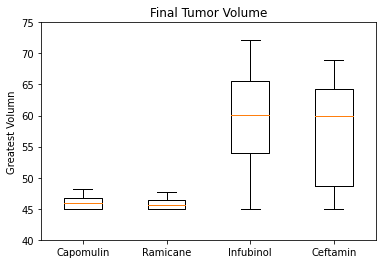

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumns = [capomulin["Greatest Volumn"],ramicane["Greatest Volumn"],infubinol["Greatest Volumn"],ceftamin["Greatest Volumn"]]
fig1,ax1 = plt.subplots()
ax1.boxplot(volumns,labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Greatest Volumn')
ax1.set_ylim(40,75)
plt.show()

## Line and Scatter Plots

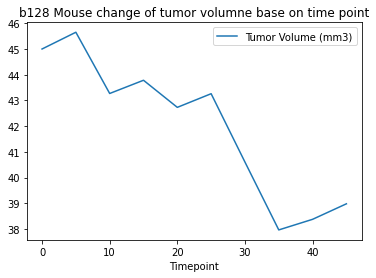

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean.head()
b128 = clean.set_index("Mouse ID")
b128 = b128.loc["b128"]
b128

b128.plot.line(x = "Timepoint",y = "Tumor Volume (mm3)")
plt.title("b128 Mouse change of tumor volumne base on time point")
plt.show()

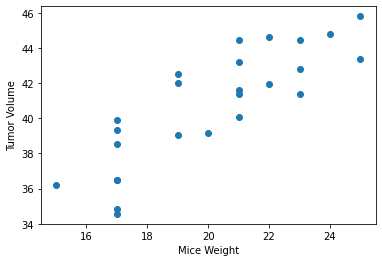

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
clean.head()
cap = clean.set_index("Drug Regimen")
cap = cap.loc["Capomulin"]
ave = cap.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
ave_weight = pd.merge(ave,cap,on = "Mouse ID", how = "left")
ave_weight = ave_weight.drop(['Timepoint','Tumor Volume (mm3)_y','Metastatic Sites','Sex','Age_months',"Mouse ID"], axis=1)
ave_weight = ave_weight.drop_duplicates(['Tumor Volume (mm3)_x','Weight (g)'])
ave_weight
plt.scatter(ave_weight['Weight (g)'],ave_weight['Tumor Volume (mm3)_x'])
plt.xlabel('Mice Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ave_weight
x_values = ave_weight["Weight (g)"]
y_values = ave_weight["Tumor Volume (mm3)_x"]
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


The r-squared is: 0.7088568047708717


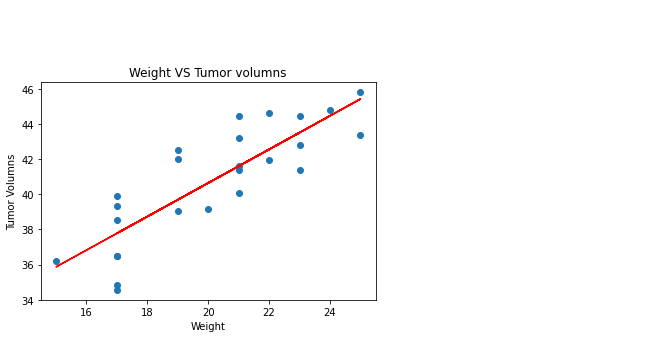

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volumns')
plt.title('Weight VS Tumor volumns')
print(f"The r-squared is: {rvalue**2}")
plt.show()